In [0]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [10]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_train.shape[1:])))


autoencoder.fit(x=x_train, y=x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.3603 - val_loss: 0.2715
Epoch 2/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2640 - val_loss: 0.2529
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2422 - val_loss: 0.2293
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2208 - val_loss: 0.2106
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2054 - val_loss: 0.1979
Epoch 6/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1945 - val_loss: 0.1886
Epoch 7/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1864 - val_loss: 0.1814
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1798 - val_loss: 0.1755
Epoch 9/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1743 - val_loss: 0.1703
Epoch

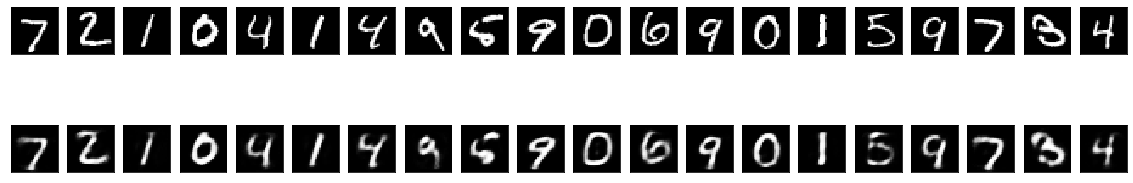

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()